# Fit namereneho prubehu axialniho mikropohybu podel osy $z$ modelem

## nacteni namerenych dat mikropohybu

In [1]:
# data import
#import pandas as pd
import numpy as np

#data_bezcond = pd.read_csv("axial_EMM_10_03_2020_part1_delim.txt", sep="\t").values
#voltages_bezcond = pd.read_csv("axial_EMM_10_03_2020_part1_voltages.txt", sep="\t").values

data_bezcond_p1 = np.genfromtxt("axial_EMM_10_03_2020_part1_delim.txt", delimiter="\t")[:,:8]
voltages_bezcond_p1 = np.genfromtxt("axial_EMM_10_03_2020_part1_voltages.txt", delimiter="\t")
data_bezcond_p2 = np.genfromtxt("axial_EMM_10_03_2020_part2_delim.txt", delimiter="\t")[:,:8]
voltages_bezcond_p2 = np.genfromtxt("axial_EMM_10_03_2020_part2_voltages.txt", delimiter="\t")
data_bezcond_p3 = np.genfromtxt("axial_EMM_10_03_2020_part3_delim.txt", delimiter="\t")[:,:2]
voltages_bezcond_p3 = np.genfromtxt("axial_EMM_10_03_2020_part3_voltages.txt", delimiter="\t")

fotkor_bezcond=np.concatenate( (data_bezcond_p1 ,data_bezcond_p2, data_bezcond_p3) ,axis=1)
voltages_bezcond=np.concatenate( (voltages_bezcond_p1 ,voltages_bezcond_p2, voltages_bezcond_p3) ,axis=0)

# pomocne promene
fotkor_shape = np.shape(fotkor_bezcond)

# parametry odecitani foton-korelacnich dat
t_res = 256e-12  # casove rozliseni histogramu v s
t_measure = 150 # doba nacitani dat v s

# casova skala foton-kor. dat
t_scale = np.array( range(0,fotkor_shape[0]) ) *t_res

In [2]:
import numpy as np

#data_bezcond = pd.read_csv("axial_EMM_10_03_2020_part1_delim.txt", sep="\t").values
#voltages_bezcond = pd.read_csv("axial_EMM_10_03_2020_part1_voltages.txt", sep="\t").values

data_cond_p1 = np.genfromtxt("axial_EMM_11_03_2020_vyvazeny_part1_delim.txt", delimiter="\t")[:,:8]
voltages_cond_p1 = np.genfromtxt("axial_EMM_11_03_2020_vyvazeny_part1_voltages.txt", delimiter="\t")
data_cond_p2 = np.genfromtxt("axial_EMM_11_03_2020_vyvazeny_part2_delim.txt", delimiter="\t")[:,:2]
voltages_cond_p2 = np.genfromtxt("axial_EMM_11_03_2020_vyvazeny_part2_voltages.txt", delimiter="\t")

fotkor_cond=np.concatenate( (data_cond_p1 ,data_cond_p2) ,axis=1)
voltages_cond=np.concatenate( (voltages_cond_p1 ,voltages_cond_p2) ,axis=0)

# pomocne promene
fotkor_cond_shape = np.shape(fotkor_cond)

# parametry odecitani foton-korelacnich dat
t_res_cond = 256e-12  # casove rozliseni histogramu v s
t_measure_cond = 100 # doba nacitani dat v s

# casova skala foton-kor. dat
t_scale_cond = np.array( range(0,fotkor_cond_shape[0]) ) *t_res_cond

analyza

In [3]:
# odhad periody triggeru
T_trig = ( fotkor_bezcond[fotkor_shape[0]-2, 9] / fotkor_bezcond[fotkor_shape[0]-3, 9] )* t_res + t_scale[fotkor_shape[0]-2]

# frekvence buzeni pasti

drive_freq = 1/T_trig
Omega = 2*np.pi * drive_freq
drive_freq

30032035.976450287

In [4]:
# odhad periody triggeru
T_trig_cond = ( fotkor_cond[fotkor_cond_shape[0]-2, 0] / fotkor_cond[fotkor_cond_shape[0]-3, 0] )* t_res_cond + t_scale_cond[fotkor_cond_shape[0]-2]

# frekvence buzeni pasti

drive_freq_cond = 1/T_trig_cond
Omega_cond = 2*np.pi * drive_freq_cond
drive_freq_cond



29907562.902327076

In [10]:
# funkce vracejici residua
def fit_resid(x, Omega, S, time_step):
    # x = [S_0, Delta S, phi]
    len_S = len(S)
    #print(len_S)
    S_fit = x[0] + x[1] * np.cos(Omega * time_step * np.arange(0, len_S) - x[2])
    return S - S_fit

def fit_func(x, Omega, time_points):
    return x[0] + x[1] * np.cos(Omega * time_points - x[2])

fit dat bez kondiku

In [11]:
from scipy.optimize import least_squares
# cyklus fitujici vsechny foton-korelacni data

x = np.zeros( (3,fotkor_shape[1]) )
DeltaS_S_ratio = []
for i in range(fotkor_shape[1]):
    x0 = [fotkor_bezcond[:fotkor_shape[0]-2,i].mean(), 0.5* ( fotkor_bezcond[:fotkor_shape[0]-2,i].max()
        -fotkor_bezcond[:fotkor_shape[0]-2,i].min() ), 1.5]

    #fit = least_squares(fit_resid,x0, args=(Omega, fotkor_bezcond[:fotkor_shape[0]-2,0], t_res) , method="lm", ftol=1e-10)
    fit = least_squares(fit_resid,x0, args=(Omega, fotkor_bezcond[:fotkor_shape[0]-2,i], t_res) , ftol=1e-10, xtol=1e-10)
    
    x[:,i] = fit.x
    DeltaS_S_ratio.append(x[1,i]/x[0,i]  )
    

fit dat s kondikem

In [12]:
# cyklus fitujici vsechny foton-korelacni data

x_cond = np.zeros( (3,fotkor_cond_shape[1]) )
DeltaS_S_ratio_cond = []
for i in range(fotkor_cond_shape[1]):
    x0 = [fotkor_cond[:fotkor_cond_shape[0]-2,i].mean(), 0.5* ( fotkor_cond[:fotkor_cond_shape[0]-2,i].max()
        -fotkor_cond[:fotkor_cond_shape[0]-2,i].min() ), 2]

    #fit = least_squares(fit_resid,x0, args=(Omega, fotkor_bezcond[:fotkor_shape[0]-2,0], t_res) , method="lm", ftol=1e-10)
    fit = least_squares(fit_resid,x0, args=(Omega_cond, fotkor_cond[:fotkor_cond_shape[0]-2,i], t_res_cond) , ftol=1e-10, xtol=1e-10)
    
    x_cond[:,i] = fit.x
    DeltaS_S_ratio_cond.append( x_cond[1,i]/x_cond[0,i]  )

kontrola plotu

In [22]:
# plot dat
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import rcParams

rcParams["font.size"] = 14
rcParams["mathtext.fontset"] = "cm"
rcParams["mathtext.rm"] = "serif"
rcParams["text.usetex"] = "true";
rc('text', usetex=True)

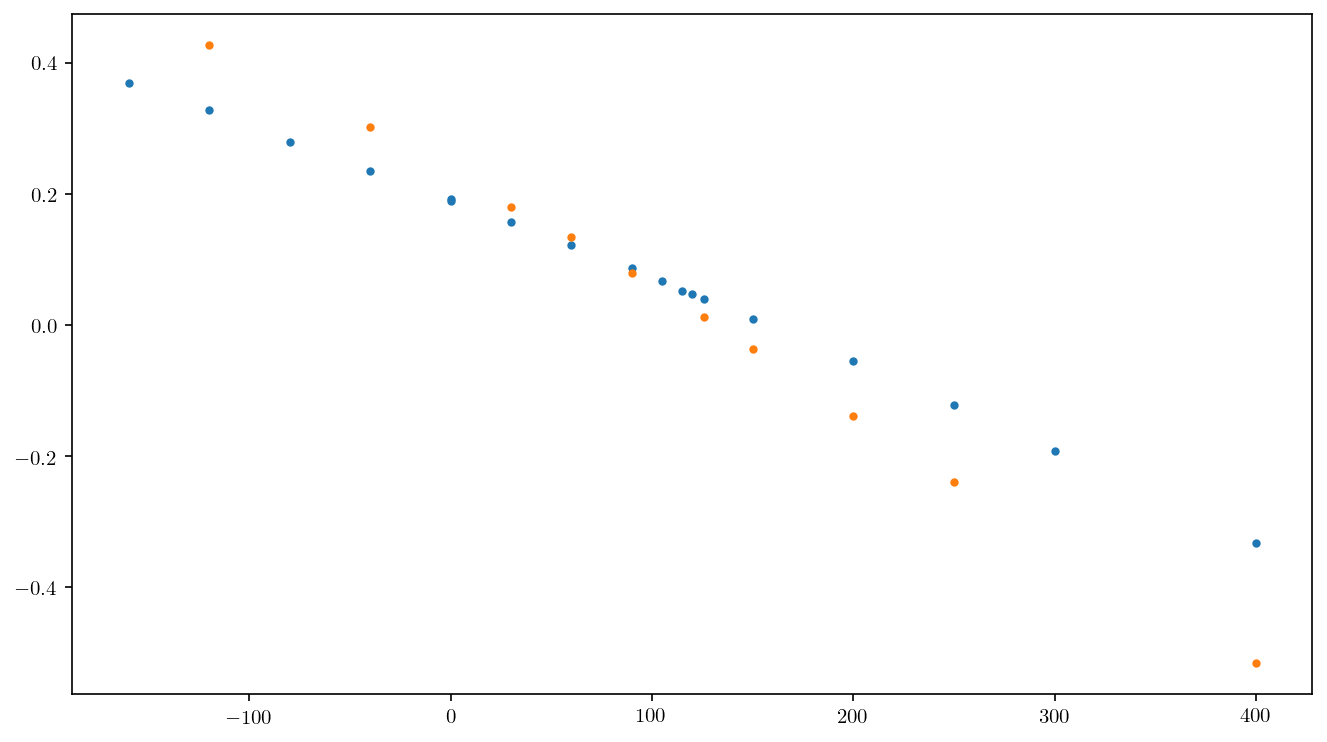

In [13]:
delta_U = voltages_bezcond[:,0] - voltages_bezcond[:,1]
delta_U_cond = voltages_cond[:,0] - voltages_cond[:,1]




my_dpi = 150
siz = 100
sizex = 16*siz
sizey = 9*siz

plt.figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)
plt.plot(delta_U, DeltaS_S_ratio, '.')
plt.plot(delta_U_cond, DeltaS_S_ratio_cond, '.')

zavislost na z

In [14]:
alpha_bezcond = delta_U / (voltages_bezcond[:,0] + voltages_bezcond[:,1])
alpha_cond = delta_U_cond / (voltages_cond[:,0] + voltages_cond[:,1])

a = 0.000357087248516796
b = 0.0000614272209845667
c = 0.000214572720416111

z_bezcond = a* alpha_bezcond + b* alpha_bezcond**3 + c *alpha_bezcond**5
z_cond = a*alpha_cond  + b* alpha_cond**3 + c* alpha_cond**5

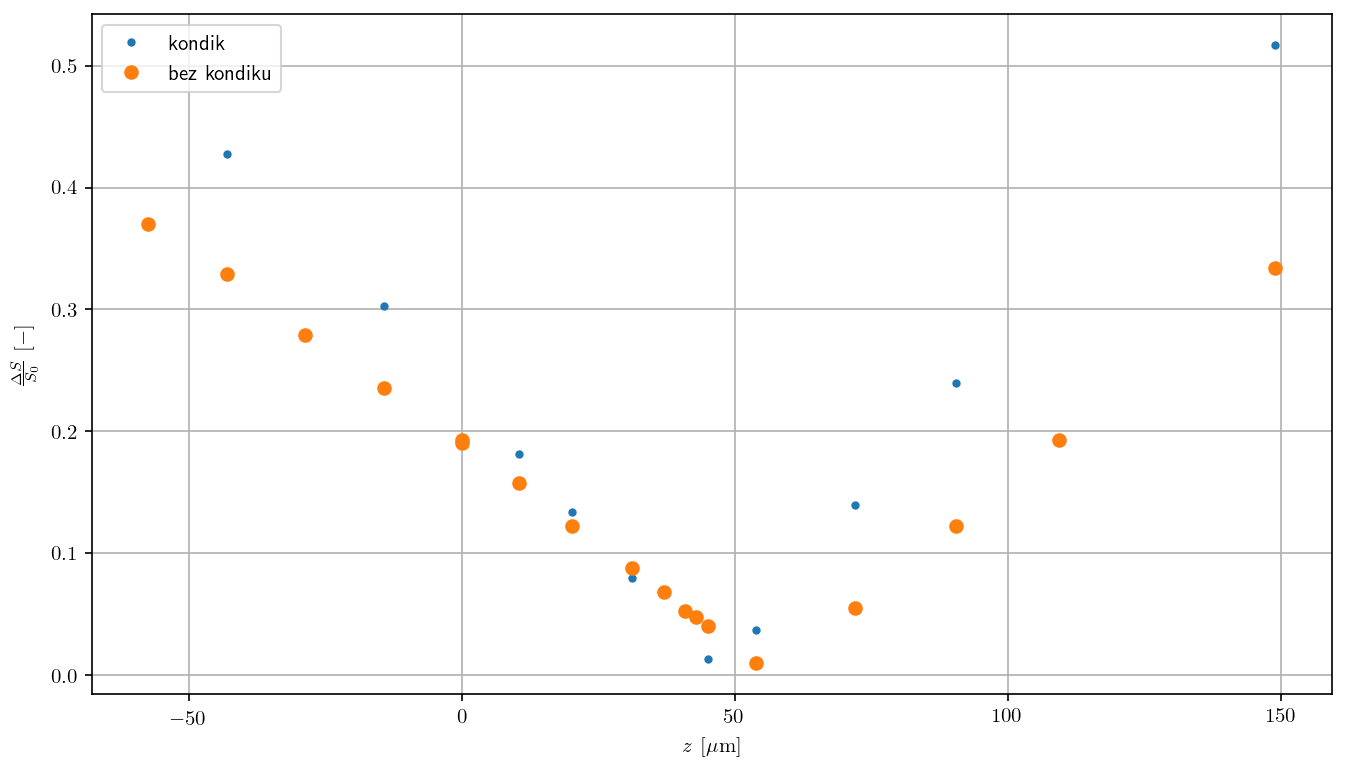

In [15]:
plt.figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)
plt.plot(z_cond*1e6, np.abs( DeltaS_S_ratio_cond ), '.', label="kondik")
plt.plot(z_bezcond*1e6, np.abs(DeltaS_S_ratio), 'o', label="bez kondiku")
plt.xlabel(r"$ z \, \, \rm [\mu m]$")
plt.ylabel(r"$ \frac{\Delta S}{S_0} \, \, \rm [-]$")

plt.legend()
plt.grid()

## fitovani techto dat

nactu si jednotkove osove pole z comsolu

In [16]:
## nacteni dat ze souboru
# pole generovano axialni elektrodou v + 2.25mm
z_data = np.genfromtxt("axial_field_unitary_rad_ax_delim.txt")[:,1]
E_field_ax_data = np.genfromtxt("axial_field_unitary_rad_ax_delim.txt")[:,2]
E_field_rad_data_par = np.genfromtxt("axial_field_unitary_rad_ax_delim.txt")[:,3]
E_field_rad_data_jedna = E_field_rad_data_par/2 # pole generovane jednou radialni elektrodou na ose z je polovicni oproti poli
                                                # generovanem parem radialnich elektrod
    
leng_data = len(z_data)

nyni je treba definovat fci, ktera vraci amplitudu E_pole urcitym zpusobem skalovanou pro dane parametry.

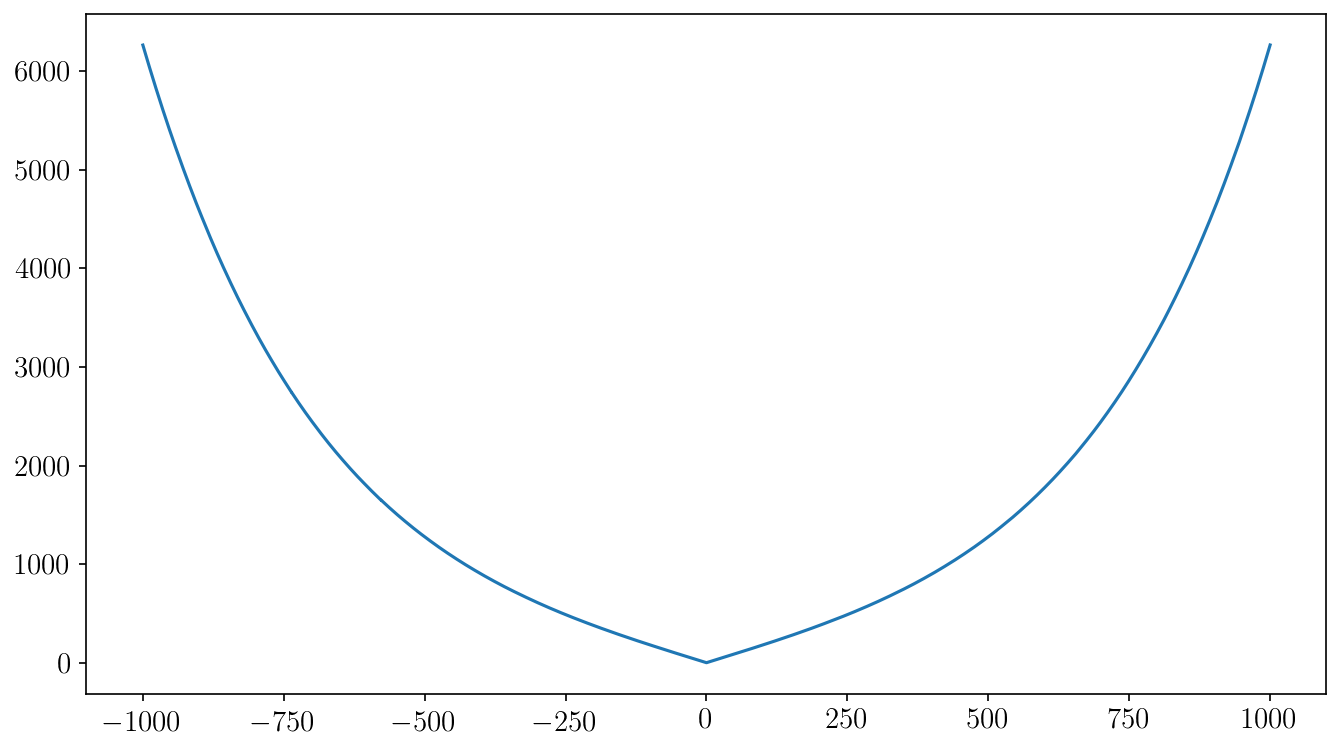

In [23]:
# napeti a faze na elektrodach pasti
Vrf_1 = 150
Vrf_3 = 150
Vrf_5 = 0
Vrf_6 = 0
Vrf = np.array( [Vrf_1, Vrf_3, Vrf_5, Vrf_6] )

phi_2 = 0
phi_56 = 0

phi = np.array( [0, phi_2, phi_56] )

rad_amp = sum( Vrf[0:2] * np.exp(phi[0:2] * 1j ) )
ax_5_amp = Vrf[2] * np.exp(phi[2] * 1j )
ax_6_amp = Vrf[3] * np.exp(phi[2] * 1j )

E_rf_complex = rad_amp * E_field_rad_data_jedna - ax_5_amp * E_field_ax_data[::-1] + ax_6_amp * E_field_ax_data

# amplituda a faze
E_rf_amp = np.abs(E_rf_complex)


plt.figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)
plt.plot(z_data*1e3, E_rf_amp)

In [18]:
from scipy import interpolate

# definice interpolacnich fci
E_field_ax_6 = interpolate.interp1d(z_data*1e3, E_field_ax_data)
E_field_ax_5 = interpolate.interp1d(z_data*1e3, -1*E_field_ax_data[::-1])
E_field_rad_jedna = interpolate.interp1d(z_data*1e3, E_field_rad_data_jedna)

vypada ok

In [19]:
def E_rf_asym_amp(Vrf, phi, z, f_interp):
    # Vrf = [Vrf_1, Vrf_3, Vrf_5, Vrf_6] # defaultne mam Vrf24 = 0 => asym drive
    # phi = [phi_1 = 0, phi_2, phi_56]  # phi_1 = 0 -- volba, dale pak phi_5=phi_6
    # z = [] body, ve kterych chci fci vyhodnotit
    # f_interp = (E_field_rad, E_field_ax5, E_field_ax6) 
    
    # out: amplituda E_pole
    
    rad_amp = sum( Vrf[0:2] * np.exp(phi[0:2] * 1j ) )
    ax_5_amp = Vrf[2] * np.exp(phi[2] * 1j )
    ax_6_amp = Vrf[3] * np.exp(phi[2] * 1j )
    
    E_rf_complex = rad_amp * f_interp[0](z) + ax_5_amp * f_interp[1](z) + ax_6_amp * f_interp[2](z)

    # amplituda a faze
    return np.abs(E_rf_complex)

zkusim reprodukovat predchozi graf

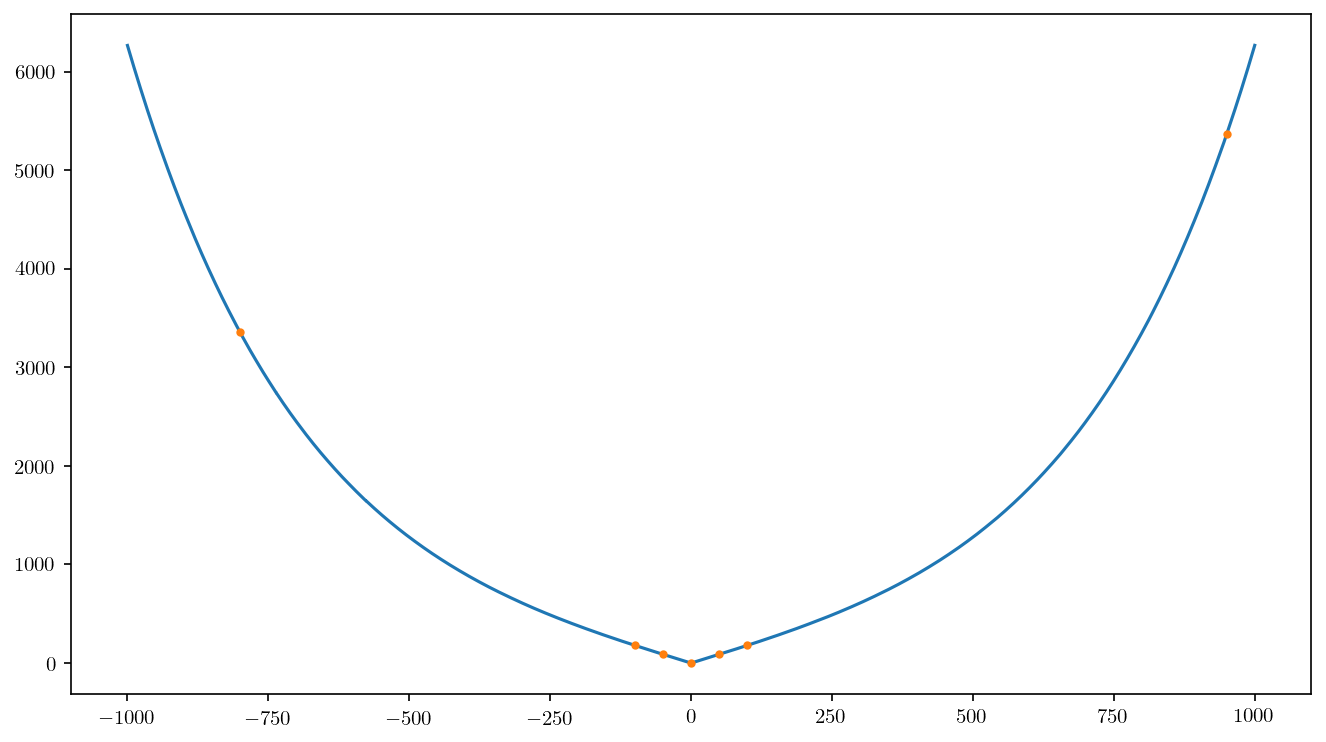

In [21]:
# napeti a faze na elektrodach pasti
Vrf_1 = 150
Vrf_3 = 150
Vrf_5 = 0
Vrf_6 = 0
Vrf = np.array( [Vrf_1, Vrf_3, Vrf_5, Vrf_6] )

phi_2 = 0
phi_56 = 0

phi = np.array( [0, phi_2, phi_56] )

plt.figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)
plt.plot(z_data*1e3, E_rf_amp)
plt.plot([-800,-100, -50, 0, 50, 100, 950], E_rf_asym_amp(Vrf, phi, [-800,-100, -50, 0, 50, 100, 950],
                                                (E_field_rad_jedna , E_field_ax_5, E_field_ax_6)), '.')

ok, funguje 

## prechazim do faze fitovani

In [24]:
# funkce vracejici residua
def E_rf_amp_asym_resid(params, DS_S, z_points, f_interp):
    # params = [Vrf_1, Vrf_3, Vrf_5, Vrf_6, phi_2, phi_56, scale]
    # DS_S -> namerene hodnoty amplitudy modulace foton-kor. signaly
    # z_points -> ztove body v [um]
    
    Vrf = np.array(params[:4])
    phi = np.array( [ 0, params[4], params[5] ] )
    
    return( ( DS_S - params[6]*E_rf_asym_amp(Vrf, phi, z_points, f_interp)**2 ) )
    

pokus o fit

In [38]:
from scipy.optimize import least_squares

f_interp = (E_field_rad_jedna, E_field_ax_5, E_field_ax_6) # interpolacni fce jednotkovych osovych poli
DS_S_bezcond = np.abs(DeltaS_S_ratio)

params0 = [150, 150, 0, 0, 0.1, 0.1, 1e-3]

fit = least_squares(E_rf_amp_asym_resid, params0, args=(DS_S_bezcond, z_bezcond*1e6, f_interp))
fit

 active_mask: array([0., 0., 0., 0., 0., 0., 0.])
        cost: 0.005210525301270757
         fun: array([ 0.02812353,  0.02518187,  0.02600164,  0.00410277, -0.00536077,
       -0.01180296, -0.01852589, -0.01920132, -0.02179436, -0.03940668,
       -0.01148656,  0.02177187,  0.04137817, -0.01407314,  0.04078198,
       -0.02329909, -0.02594027,  0.0004115 ])
        grad: array([ 8.98530398e-07, -4.74730432e-07,  3.47644132e-06, -6.53212105e-07,
        1.57686624e-04, -7.79729232e-05,  0.00000000e+00])
         jac: array([[-5.53762156e-05, -5.13745301e-05,  3.38196780e+00,
        -3.38195364e+00, -2.99567324e-02,  9.57475790e-05,
         0.00000000e+00],
       [-5.53762156e-05, -5.13745301e-05,  3.38196780e+00,
        -3.38195364e+00, -2.99567324e-02,  9.57475790e-05,
         0.00000000e+00],
       [-9.86297924e-03, -1.72264850e-02,  2.91636569e+00,
        -3.09364237e+00, -7.36318377e+00, -4.54353146e-01,
         0.00000000e+00],
       [-9.64559968e-03, -3.96331119e-02,  2

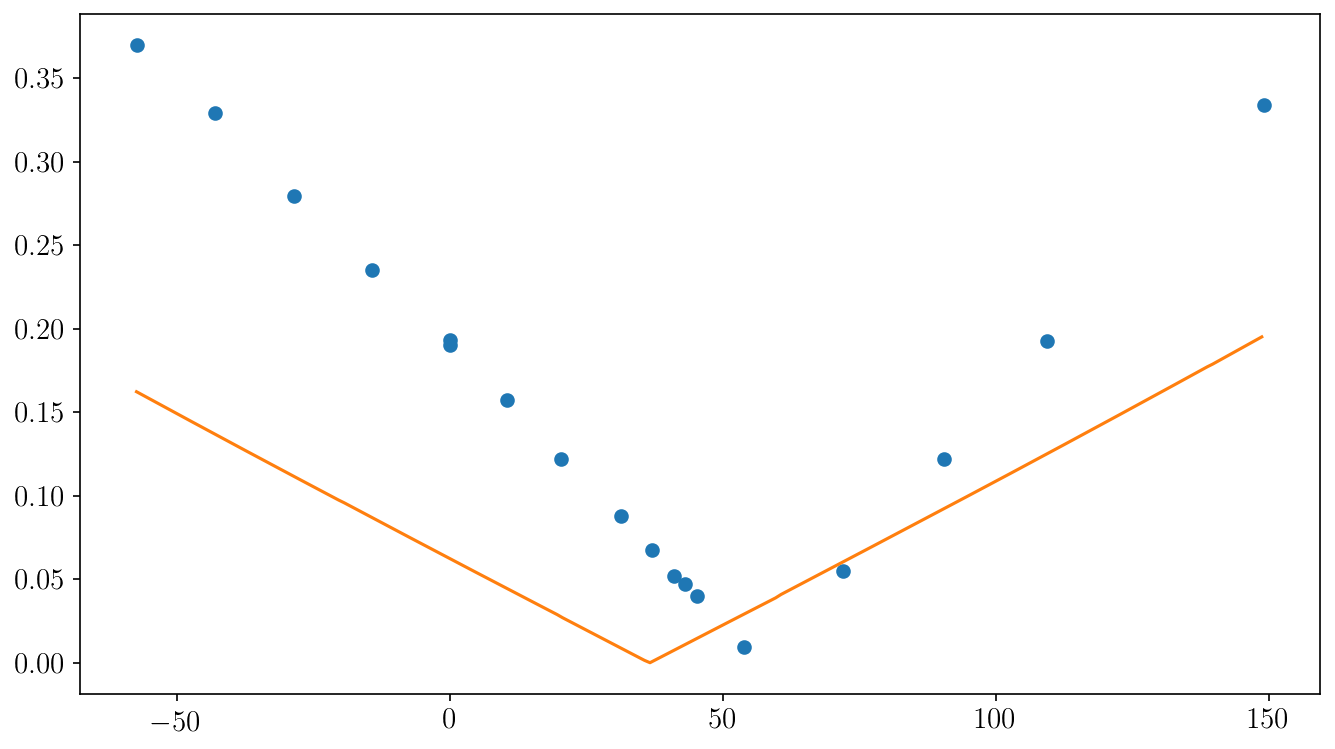

In [46]:
# vyploceni fitu

z_fit = np.arange(z_bezcond.min()*1e6, z_bezcond.max()*1e6)
#E_amp_fit = fit.x[6]* E_rf_asym_amp(fit.x[:4], np.array( [0, fit.x[4], fit.x[5]] ), z_fit, f_interp )
E_amp_fit = 1e-3* E_rf_asym_amp(np.array([200,200,20,35]), np.array( [0, 0, 0] ), z_fit, f_interp )

plt.figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)
plt.plot(z_bezcond*1e6, np.abs(DeltaS_S_ratio), 'o', label="bez kondiku")
plt.plot(z_fit, E_amp_fit)